In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
(x_train, y_mnist_train), (x_test, y_mnist_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
print(x_train.shape)

(60000, 28, 28, 1)


##### MNIST Divided by Class

In [8]:
x_train0 = x_train[y_mnist_train == 0]
x_train1 = x_train[y_mnist_train == 1]
x_train2 = x_train[y_mnist_train == 2]
x_train3 = x_train[y_mnist_train == 3]
x_train4 = x_train[y_mnist_train == 4]
x_train5 = x_train[y_mnist_train == 5]
x_train6 = x_train[y_mnist_train == 6]
x_train7 = x_train[y_mnist_train == 7]
x_train8 = x_train[y_mnist_train == 8]
x_train9 = x_train[y_mnist_train == 9]
print(f'{x_train0.shape}: X Train Label 0, {x_train1.shape}: X Train Label 1')
print(f'{x_train2.shape}: X Train Label 2, {x_train3.shape}: X Train Label 3')
print(f'{x_train4.shape}: X Train Label 4, {x_train5.shape}: X Train Label 5')
print(f'{x_train6.shape}: X Train Label 6, {x_train7.shape}: X Train Label 7')
print(f'{x_train8.shape}: X Train Label 8, {x_train9.shape}: X Train Label 9')

(5923, 28, 28, 1): X Train Label 0, (6742, 28, 28, 1): X Train Label 1
(5958, 28, 28, 1): X Train Label 2, (6131, 28, 28, 1): X Train Label 3
(5842, 28, 28, 1): X Train Label 4, (5421, 28, 28, 1): X Train Label 5
(5918, 28, 28, 1): X Train Label 6, (6265, 28, 28, 1): X Train Label 7
(5851, 28, 28, 1): X Train Label 8, (5949, 28, 28, 1): X Train Label 9


In [9]:
y_mnist_train0 = y_mnist_train[y_mnist_train == 0]
y_mnist_train1 = y_mnist_train[y_mnist_train == 1]
y_mnist_train2 = y_mnist_train[y_mnist_train == 2]
y_mnist_train3 = y_mnist_train[y_mnist_train == 3]
y_mnist_train4 = y_mnist_train[y_mnist_train == 4]
y_mnist_train5 = y_mnist_train[y_mnist_train == 5]
y_mnist_train6 = y_mnist_train[y_mnist_train == 6]
y_mnist_train7 = y_mnist_train[y_mnist_train == 7]
y_mnist_train8 = y_mnist_train[y_mnist_train == 8]
y_mnist_train9 = y_mnist_train[y_mnist_train == 9]
print(f'{y_mnist_train0.shape}: y Train Label 0, {y_mnist_train1.shape}: y Train Label 1')
print(f'{y_mnist_train2.shape}: y Train Label 2, {y_mnist_train3.shape}: y Train Label 3')
print(f'{y_mnist_train4.shape}: y Train Label 4, {y_mnist_train5.shape}: y Train Label 5')
print(f'{y_mnist_train6.shape}: y Train Label 6, {y_mnist_train7.shape}: y Train Label 7')
print(f'{y_mnist_train8.shape}: y Train Label 8, {y_mnist_train9.shape}: y Train Label 9')

(5923,): y Train Label 0, (6742,): y Train Label 1
(5958,): y Train Label 2, (6131,): y Train Label 3
(5842,): y Train Label 4, (5421,): y Train Label 5
(5918,): y Train Label 6, (6265,): y Train Label 7
(5851,): y Train Label 8, (5949,): y Train Label 9


In [10]:
traindata = np.vstack((x_train0, x_train1[:6683], x_train2, x_train3, x_train4[:5818], x_train5[:5403], x_train6[:5894],
                       x_train7[:6252], x_train8[:5849], x_train9))

In [12]:
traindata_shuffled = shuffle(traindata, random_state=42)

In [13]:
print(traindata_shuffled.shape)

(59860, 28, 28, 1)


In [3]:
import pickle

with open ('/content/drive/MyDrive/Projects/1/636_project1_train_images', 'rb') as trainfile:
  noisyimages = pickle.load(trainfile)

with open ('/content/drive/MyDrive/Projects/1/636_project1_train_labels', 'rb') as labelsfile:
  noisylabels = pickle.load(labelsfile)

In [4]:
noisyimages = np.array(noisyimages)
noisylabels = np.array(noisylabels)

noisyimages = noisyimages.astype('float32') / 255
noisyimages = noisyimages.reshape(len(noisyimages), 28, 28, 1)
print(noisyimages.shape)

(60000, 28, 28, 1)


In [18]:
x_train_noisy0 = noisyimages[noisylabels == 0]
x_train_noisy1 = noisyimages[noisylabels == 1]
x_train_noisy2 = noisyimages[noisylabels == 2]
x_train_noisy3 = noisyimages[noisylabels == 3]
x_train_noisy4 = noisyimages[noisylabels == 4]
x_train_noisy5 = noisyimages[noisylabels == 5]
x_train_noisy6 = noisyimages[noisylabels == 6]
x_train_noisy7 = noisyimages[noisylabels == 7]
x_train_noisy8 = noisyimages[noisylabels == 8]
x_train_noisy9 = noisyimages[noisylabels == 9]
print(f'{x_train_noisy0.shape}: X Train Noisy Label 0, {x_train_noisy1.shape}: X Train Noisy Label 1')
print(f'{x_train_noisy2.shape}: X Train Noisy Label 2, {x_train_noisy3.shape}: X Train Noisy Label 3')
print(f'{x_train_noisy4.shape}: X Train Noisy Label 4, {x_train_noisy5.shape}: X Train Noisy Label 5')
print(f'{x_train_noisy6.shape}: X Train Noisy Label 6, {x_train_noisy7.shape}: X Train Noisy Label 7')
print(f'{x_train_noisy8.shape}: X Train Noisy Label 8, {x_train_noisy9.shape}: X Train Noisy Label 9')

(5972, 28, 28, 1): X Train Noisy Label 0, (6683, 28, 28, 1): X Train Noisy Label 1
(6010, 28, 28, 1): X Train Noisy Label 2, (6156, 28, 28, 1): X Train Noisy Label 3
(5818, 28, 28, 1): X Train Noisy Label 4, (5403, 28, 28, 1): X Train Noisy Label 5
(5894, 28, 28, 1): X Train Noisy Label 6, (6252, 28, 28, 1): X Train Noisy Label 7
(5849, 28, 28, 1): X Train Noisy Label 8, (5963, 28, 28, 1): X Train Noisy Label 9


In [16]:
y_noisy_train0 = noisylabels[noisylabels == 0]
y_noisy_train1 = noisylabels[noisylabels == 1]
y_noisy_train2 = noisylabels[noisylabels == 2]
y_noisy_train3 = noisylabels[noisylabels == 3]
y_noisy_train4 = noisylabels[noisylabels == 4]
y_noisy_train5 = noisylabels[noisylabels == 5]
y_noisy_train6 = noisylabels[noisylabels == 6]
y_noisy_train7 = noisylabels[noisylabels == 7]
y_noisy_train8 = noisylabels[noisylabels == 8]
y_noisy_train9 = noisylabels[noisylabels == 9]
print(f'{y_noisy_train0.shape}: y Train Label 0, {y_noisy_train1.shape}: y Train Label 1')
print(f'{y_noisy_train2.shape}: y Train Label 2, {y_noisy_train3.shape}: y Train Label 3')
print(f'{y_noisy_train4.shape}: y Train Label 4, {y_noisy_train5.shape}: y Train Label 5')
print(f'{y_noisy_train6.shape}: y Train Label 6, {y_noisy_train7.shape}: y Train Label 7')
print(f'{y_noisy_train8.shape}: y Train Label 8, {y_noisy_train9.shape}: y Train Label 9')

(5972,): y Train Label 0, (6683,): y Train Label 1
(6010,): y Train Label 2, (6156,): y Train Label 3
(5818,): y Train Label 4, (5403,): y Train Label 5
(5894,): y Train Label 6, (6252,): y Train Label 7
(5849,): y Train Label 8, (5963,): y Train Label 9


In [19]:
traindata_noisy = np.vstack((x_train_noisy0[:5923], x_train_noisy1, x_train_noisy2[:5958], x_train_noisy3[:6131], x_train_noisy4,
                             x_train_noisy5, x_train_noisy6, x_train_noisy7, x_train_noisy8, x_train_noisy9[:5949]))

In [20]:
traindata_noisy_shuffled = shuffle(traindata_noisy, random_state=42)

In [21]:
print(traindata_noisy_shuffled.shape)

(59860, 28, 28, 1)


##### Model

In [ ]:
model = Sequential([
                    # encoder network
                    Conv2D(256, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    Conv2D(128, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(64, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    Conv2D(64, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(128, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(256, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
# model.summary()


In [ ]:
history = model.fit(traindata_noisy, traindata, epochs=150, batch_size=128)

In [ ]:
model.save('/content/drive/MyDrive/Data Science/Deep-Learning/Projects/1/autoencoder_edition2_256_150_notShuffled.keras')

In [5]:
autoencoder = tf.keras.saving.load_model(
    '/content/drive/MyDrive/Projects/1/autoencoder_edition2_256_150_notShuffled.keras'
)

In [6]:
pred = autoencoder.predict(noisyimages)

1875/1875 [==============================] - 15s 7ms/step


In [7]:
def display(array1, array2, labels):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    print(labels[indices])

    for i, (image1, image2) in enumerate(zip(images1, images2)):

        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

[1 0 7 8 9 1 4 5 4 5]


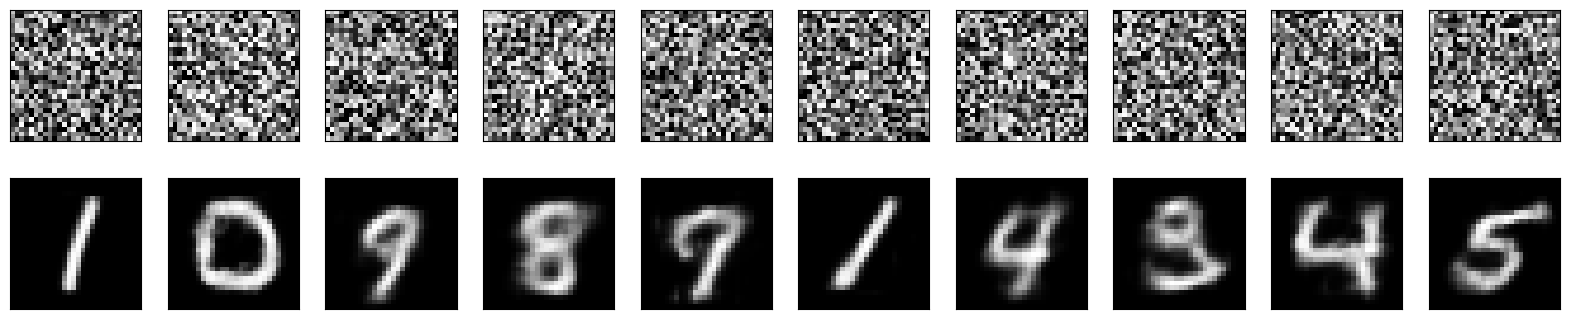

In [8]:
display(noisyimages, pred, noisylabels)

In [9]:
from sklearn.model_selection import train_test_split

X = pred
y = noisylabels

# Split the data into training and testing sets
X_train_clf, X_val_clf, y_train_clf, y_val_clf = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
y_train_clf = tf.one_hot(y_train_clf, depth = 10)
y_val_clf = tf.one_hot(y_val_clf, depth = 10)

In [11]:
X_train_clf.shape

(48000, 28, 28, 1)

In [12]:
from tensorflow.keras import layers

In [ ]:
# data_augmentation = tf.keras.Sequential(
#     [
#         layers.RandomFlip("horizontal"),
#         layers.RandomRotation(0.0),
#         layers.RandomZoom(0.0),
#     ]
# )

In [13]:
inputs = tf.keras.Input(shape=(28, 28, 1))
# x = data_augmentation(inputs)
x = inputs
# x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

for size in [32, 64, 128, 256, 512]:
    residual = x

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    residual = layers.Conv2D(
        size, 1, strides=2, padding="same", use_bias=False)(residual)
    x = layers.add([x, residual])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [14]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

In [15]:
callback_list_residual = [
    EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    ModelCheckpoint(
        filepath="/content/drive/MyDrive/Projects/1/classifier_residual_50.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]

In [17]:
model.compile(loss="CategoricalCrossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
history_clf = model.fit(
    X_train_clf,
    y_train_clf,
    epochs=50,
    # callbacks=callback_list_residual,
    validation_data=(X_val_clf, y_val_clf))

Epoch 1/50
1500/1500 [==============================] - 27s 12ms/step - loss: 0.5734 - accuracy: 0.8190 - val_loss: 0.5160 - val_accuracy: 0.8336
Epoch 2/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.5192 - accuracy: 0.8343 - val_loss: 0.5703 - val_accuracy: 0.8292
Epoch 3/50
1500/1500 [==============================] - 17s 12ms/step - loss: 0.5041 - accuracy: 0.8376 - val_loss: 0.4889 - val_accuracy: 0.8432
Epoch 4/50
 512/1500 [=========>....................] - ETA: 11s - loss: 0.4911 - accuracy: 0.8400

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/MyDrive/Projects/1/classifier_residual_50.keras')

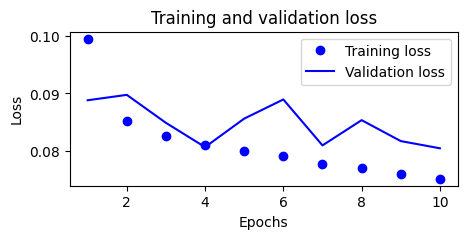

In [21]:
history_clf_dict = history_clf.history
loss_values = history_clf_dict["loss"]
val_loss_values = history_clf_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.figure(figsize=(5,2))
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

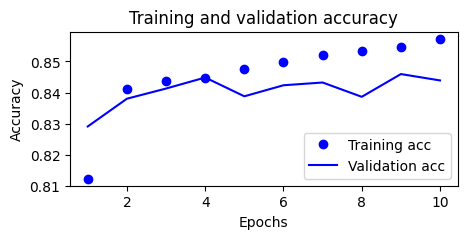

In [22]:
plt.clf()
acc = history_clf_dict["accuracy"]
val_acc = history_clf_dict["val_accuracy"]
plt.figure(figsize=(5,2))
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
classifier =  tf.keras.saving.load_model('/content/drive/MyDrive/Projects/1/classifier_residual_50.keras')